w_norm.... 80.0
w_norm.... 79.2
w_norm.... 78.4
w_norm.... 77.6
w_norm.... 76.8
w_norm.... 76.0
w_norm.... 75.2
w_norm.... 74.4
w_norm.... 73.6
w_norm.... 72.8
w_norm.... 72.0
w_norm.... 71.2
w_norm.... 70.4
w_norm.... 69.6
w_norm.... 68.8
w_norm.... 68.0
w_norm.... 67.2
w_norm.... 66.4
w_norm.... 65.6
w_norm.... 64.8
w_norm.... 64.0
w_norm.... 63.2
w_norm.... 62.4
w_norm.... 61.6
w_norm.... 60.8
w_norm.... 60.0
w_norm.... 59.2
w_norm.... 58.4
w_norm.... 57.6
w_norm.... 56.8
w_norm.... 56.0
w_norm.... 55.2
w_norm.... 54.4
w_norm.... 53.6
w_norm.... 52.8
w_norm.... 52.0
w_norm.... 51.2
w_norm.... 50.4
w_norm.... 49.6
w_norm.... 48.8
w_norm.... 48.0
w_norm.... 47.2
w_norm.... 46.4
w_norm.... 45.6
w_norm.... 44.8
w_norm.... 44.0
w_norm.... 43.2
w_norm.... 42.4
w_norm.... 41.6
w_norm.... 40.8
w_norm.... 40.0
w_norm.... 39.2
w_norm.... 38.4
w_norm.... 37.6
w_norm.... 36.8
w_norm.... 36.0
w_norm.... 35.2
w_norm.... 34.4
w_norm.... 33.6
w_norm.... 32.8
w_norm.... 32.0
w_norm.... 31.2
w_norm..

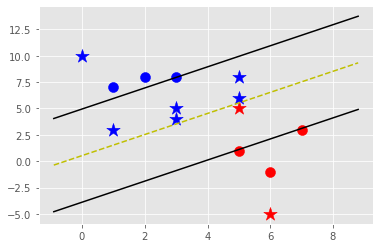

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import math
import random
style.use('ggplot')

class Support_Vector_Machine:
    #初始化支持向量机模型
    def __init__(self, visualization=True):
        self.visualization=visualization
        self.colors={1:'r', -1:'b'}
        if self.visualization:
            #初始化可视化画布
            self.fig=plt.figure()
            self.ax=self.fig.add_subplot(1,1,1)
    
    def fit(self, data):
        self.data=data
        
        #根据数据范围  初始化w与b的遍历范围  以及步长等参数
        all_data = np.array([v for _, v in self.data.items()]).flatten()
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        
        '''
            根据svm的数学推导，将寻找最佳分类超平面的问题转换成了一个凸优化的求解问题，
            我们算法主要思想是通过在满足优化问题约束条件下，通过多轮不同步长的迭代，去
            不断逼近问题的最优解
        
        '''
        
        #初始化||w||
        latest_optimum = self.max_feature_value*10
        
        #初始化更新||w||的多轮步长
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      self.max_feature_value * 0.001
                     ]
        #w的值另外还决定了整个超平面的角度  我们需要对各个角度进行一个变换
        step_angle = math.pi / 8
        transforms = [[math.sin(angle), math.cos(angle)] for angle in np.arange(0, math.pi, step_angle)]
        
        #初始化b的范围  以及b的步长倍数(b步长可以稍大于w步长)
        b_range_multiple = 2
        b_multiple = 5
        
        #存储||w||的更新状态以及此时的参数值    ||w|| 作为key  [w,b] 作为value
        opt_dict = {}
        
        #第一层循环   每轮以指定的步长试探最优解
        for step in step_sizes:
            
            #从当前最小的||w||开始    逐步减小||w||进行试探
            for w_norm in np.arange(latest_optimum, 0, -step):
                
                #解决浮点数运算的精度问题
                w_norm = round(w_norm, 6)
                print('w_norm....', w_norm)
                
                #标记当前||w||是否能在约束下满足条件
                found_option = False
                
                #枚举指定范围中所有的b值
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    #枚举所有的超平面的角度
                    for transformation in transforms:
                        w_t = np.array([w_norm, w_norm]) * transformation

                        #标记当前在当前 w b下是否能让所有的点都正确分类  即满足约束式   yi(xi.w+b) >= 1
                        flag = True
                        
                        #枚举所有训练数据
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t, xi) + b) >= 1:
                                    flag=False
                                    break
                            if not flag:
                                break
                        if flag:
                            opt_dict[w_norm] = [w_t, b]
                            found_option = True
                            break
                    if found_option:
                        break
            
            print('Optimized a step')
            #取出目前试探出的最小||w||
            min_norm = min(n for n in opt_dict)
            print(min_norm, '-------------min_norm')
            self.w = opt_dict[min_norm][0]
            self.b = opt_dict[min_norm][1]
            #更新最优解
            latest_optimum = min_norm

            for i in self.data:
                for xi in self.data[i]:
                    yi=i
                    print(xi,':',yi*(np.dot(self.w,xi)+self.b))     



    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()
        
    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification
        

        
#训练数据
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine()

#根据训练数据  寻找最优解超平面
svm.fit(data=data_dict)

#需要预测的数据
predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]
for p in predict_us:
    svm.predict(p)
    
svm.visualize()



In [3]:
class SimpleSMO(object):
    
    def __init__(self,X,y,b,C,tolerance,MaxIter):
        
        
        self.X = X
        self.y = y
        self.b = b
        self.C = C
        self.MaxIter = MaxIter
        self.tolerance = tolerance
        self.alpha = np.zeros((self.X.shape[0],1))
        
        
    def g(self,x_i):
        #计算对输入x_i的预测值
        #此处必须reshape(-1,1)，否则就会变成100*100矩阵
        predicted_y_i = np.sum(self.alpha * self.y.reshape(-1, 1) * (np.dot(self.X,x_i.T).reshape(-1,1))) + self.b
        return predicted_y_i

    def Error(self,x_i,y_i):
        #计算预测值与输入值的误差 
        return self.g(x_i) - y_i
    
    def SelectJ(self,i):
        #简化版SMO:随机选择第二个优化变量j，并使其不等于第一个i
        j = i
        while (j==i):
            j = int(random.uniform(0,self.X.shape[0]))
        return j
    
    def Kernal(self,m,n):
        #定义核函数，用于计算Kij，本例中Kij = X[i].*X[j]
        return self.X[m].dot(self.X[n].T)
        
    
    def Optimization(self):
        iter = 0 
        #while循环用于判定变量是否继续更新，iter只有在alpha不再发生变化时才会更新
        while (iter < self.MaxIter):
            #alphaPairsChanged用于建立alpha是否改变的标志
            alphaPairsChanged = 0
            #建立for循环，for循环作为外层循环，寻找一个变量
            for i in range(self.alpha.size):
                #获得基于当前alpha下的第i个样本的误差
                E_i = self.Error(self.X[i],self.y[i])
                ##########################################
                #选择第一个变量的要求：alpha_i是否严重违反kkt条件
                ##########################################
                if (y[i] * E_i < -self.tolerance and self.alpha[i] < self.C ) \
                or (y[i] * E_i > self.tolerance and self.alpha[i] > 0 ):
                    #违反kkt条件成立，随机选择第二个优化变量aplha_j（简化版SMO算法）
                    j = self.SelectJ(i)
                    #获得基于当前alpha下的第j个样本的误差
                    E_j = self.Error(self.X[j],self.y[j])
                    #记录未更新前alpha_i,alpha_j的值（即alpha_old值）为计算new值作准备
                    alpha_i_old = self.alpha[i].copy()
                    alpha_j_old = self.alpha[j].copy()
                    #根据alpha_i_old，alpha_j_old的值获得alpha_j_new的取值范围
                    if (self.y[i] != self.y[j]):
                        L = max(0,alpha_j_old-alpha_i_old)
                        H = min(self.C,self.C + alpha_j_old - alpha_i_old)
                    else:
                        L = max(0,alpha_j_old + alpha_i_old - self.C)
                        H = min(self.C,alpha_j_old + alpha_i_old)
                    if L == H:
                        print("L=H")
                        continue
                    #计算eta
                    eta = 2 * self.Kernal(i,j)-self.Kernal(i,i)-self.Kernal(j,j)
                    if eta>= 0:
                        print("eta>=0")
                        continue
                    #根据alpha_j_old,eta，y_i,E_i,E_j更新alpha_j_new_unc未剪辑的更新值
                    alpha_j_new_unc = alpha_j_old - y[j]*(E_i-E_j)/eta
                    #获得剪辑后的更新值并保存
                    self.alpha[j] = np.clip(alpha_j_new_unc,L,H)
                    ########################################
                    #选择第二个变量的要求：alpha_j具有足够大的变化
                    ########################################
                    if abs(self.alpha[j]-alpha_j_old) < 0.00001:
                        print("j not moving enough")
                        continue
                    #根据alpha_j_old 和 更新后的self.alpha[j] 更新 self.alpha[i]
                    self.alpha[i] += self.y[i]*self.y[j]*(alpha_j_old-self.alpha[j])
                    #更新常数项b_i_new
                    b_i_new = self.b - E_i -y[i]*self.Kernal(i,i)*(self.alpha[i]-alpha_i_old) \
                    -y[j]*self.Kernal(j,i)*(self.alpha[j]-alpha_j_old)
                    #更新常数项b_j_new
                    b_j_new = self.b - E_j -y[i]*self.Kernal(i,j)*(self.alpha[i]-alpha_i_old) \
                    -y[j]*self.Kernal(j,j)*(self.alpha[j]-alpha_j_old)
                    if (self.alpha[i]>0 and self.alpha[i]<self.C):
                        self.b = b_i_new
                    elif (self.alpha[j]>0 and self.alpha[j]<self.C):
                        self.b = b_j_new                    
                    else:
                        self.b = (b_i_new + b_j_new)/2
                    #若程序无中断，alpha必然发生改变，所以标志也要变化
                    alphaPairsChanged += 1
                    print("External loop: %d; Internal loop i :%d; alphaPairsChanged :%d" % (iter,i,alphaPairsChanged))
            #只有alpha不再改变时（此时意味着很有可能是最优解），迭代次数iter更新从而验证是否为最优解
            if (alphaPairsChanged == 0):
                iter += 1
            #alpha改变时，迭代次数iter置0
            else:
                iter = 0
            print("Iteration number : %d" % iter)     
                    



In [4]:
def PlotSVM(X,y,classifier):
    X_positive = X[y==1]
    X_negative = X[y==-1]
    plt.figure(figsize = (6,4),dpi=120)
    plt.scatter(X_positive[:,0],X_positive[:,1],color = 'orange',s=30, alpha=0.7)
    plt.scatter(X_negative[:,0],X_negative[:,1],color = 'firebrick',s=30, alpha=0.7)
    W = np.sum(classifier.alpha * classifier.y.reshape(100,1) * classifier.X,axis = 0 )
    x1, x2 = np.min(X[:,0]), np.max(X[:,0])
    y1, y2 = float((-classifier.b- W[0]*x1)/W[1]), float((-classifier.b - W[0]*x2)/W[1])
    plt.plot([x1,x2],[y1,y2],color='darkmagenta')
    #绘制支持向量
    for i, alpha in enumerate(classifier.alpha):
        if abs(alpha) > 0:
            x_sv, y_sv = X[i]
            plt.scatter(x_sv, y_sv, s=150, c='none', alpha=0.7, linewidth=1.5, edgecolor='green')
    plt.title("Simple SMO")
    plt.show()

In [5]:
with open("data.txt") as f:
    X = []
    y = []
    for line in f:
        line_split = line.split("\t")
        X.append(line_split[0:2])
        y.append(int(line_split[2].replace('\n','')))
    X = np.array(X,dtype='float64')
    y = np.array(y)

In [6]:
SimpleSMO = SimpleSMO(X,y,0,0.6,0.001,40)
SimpleSMO.Optimization()

External loop: 0; Internal loop i :0; alphaPairsChanged :1
External loop: 0; Internal loop i :5; alphaPairsChanged :2
j not moving enough
L=H
j not moving enough
External loop: 0; Internal loop i :24; alphaPairsChanged :3
j not moving enough
L=H
L=H
j not moving enough
L=H
L=H
L=H
L=H
External loop: 0; Internal loop i :57; alphaPairsChanged :4
j not moving enough
Iteration number : 0
j not moving enough
L=H
j not moving enough
L=H
External loop: 0; Internal loop i :24; alphaPairsChanged :1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L=H
L=H
Iteration number : 0
L=H
j not moving enough
L=H
External loop: 0; Internal loop i :10; alphaPairsChanged :1
j not moving enough
L=H
j not moving enough
L=H
External loop: 0; Internal loop i :30; alphaPairsChanged :2
j not moving enough
L=H
j not moving enough
j not moving enough
j not moving enough
Iteration number : 0
j not moving enough
j not moving enough
L=H
L=H
j not m

j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
External loop: 2; Internal loop i :52; alphaPairsChanged :1
j not moving enough
j not moving enough
j not moving enough
Iteration number : 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 1
j not moving en

Iteration number : 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 3
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 4
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 5
j not moving enough
External loop: 5; Internal loop i :23; alphaPairsChanged :1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 2
j not moving 

j not moving enough
Iteration number : 3
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 4
j not moving enough
j not moving enough
External loop: 4; Internal loop i :55; alphaPairsChanged :1
j not moving enough
Iteration number : 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
Iteration number : 3
j not moving enough
External loop: 3; Internal loop i :52; alphaPairsChanged :1
j not moving enough
j not moving enough
Iteration number : 0
j not moving enough
j not moving enough
j not moving enough
Iteration number : 1
j not moving enough
j not moving enough
j not moving enough
Iteration number : 2
j not moving enough
j not moving enough
j not moving enough
Iteration number : 3
j not moving enough
j not movi

j not moving enough
j not moving enough
j not moving enough
Iteration number : 1
j not moving enough
j not moving enough
j not moving enough
Iteration number : 2
j not moving enough
j not moving enough
j not moving enough
Iteration number : 3
j not moving enough
j not moving enough
j not moving enough
Iteration number : 4
j not moving enough
j not moving enough
j not moving enough
Iteration number : 5
j not moving enough
j not moving enough
j not moving enough
Iteration number : 6
j not moving enough
j not moving enough
j not moving enough
Iteration number : 7
j not moving enough
j not moving enough
j not moving enough
Iteration number : 8
j not moving enough
j not moving enough
j not moving enough
Iteration number : 9
j not moving enough
j not moving enough
j not moving enough
Iteration number : 10
j not moving enough
j not moving enough
j not moving enough
Iteration number : 11
j not moving enough
j not moving enough
j not moving enough
Iteration number : 12
j not moving enough
j not

Iteration number : 1
j not moving enough
j not moving enough
j not moving enough
Iteration number : 2
j not moving enough
j not moving enough
j not moving enough
Iteration number : 3
j not moving enough
j not moving enough
j not moving enough
Iteration number : 4
j not moving enough
j not moving enough
j not moving enough
Iteration number : 5
j not moving enough
j not moving enough
j not moving enough
Iteration number : 6
j not moving enough
j not moving enough
j not moving enough
Iteration number : 7
j not moving enough
j not moving enough
j not moving enough
Iteration number : 8
j not moving enough
j not moving enough
j not moving enough
Iteration number : 9
j not moving enough
j not moving enough
j not moving enough
Iteration number : 10
j not moving enough
j not moving enough
j not moving enough
Iteration number : 11
j not moving enough
j not moving enough
j not moving enough
Iteration number : 12
j not moving enough
j not moving enough
j not moving enough
Iteration number : 13
j n

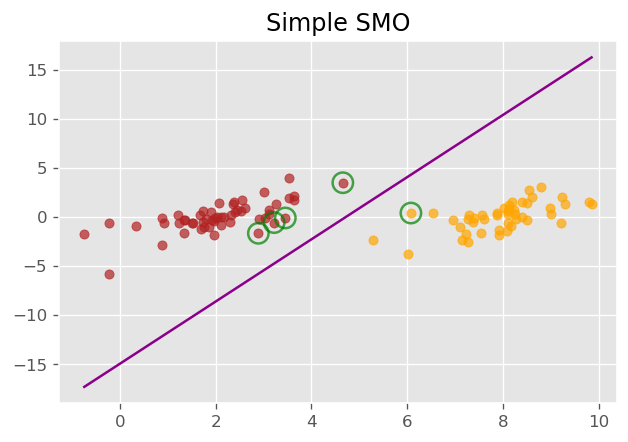

In [7]:
PlotSVM(SimpleSMO.X,SimpleSMO.y,SimpleSMO)